In [5]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 1.5 MB/s eta 0:00:01
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR


In [8]:
!ls

Auto-ARIMA.ipynb                     NP_Runner.ipynb
DLinear.ipynb                        NeuralPropherRunner.ipynb
DivvyBikes                           NeuralProphet
ETTh1.csv                            Untitled.ipynb
ETTh2.csv                            VAR.ipynb
ForecastingModel.ipynb               check_dataset_features.ipynb
GenericForecaster.ipynb              dataset
LTSF_Linear                          etth1-forecastingneuralprophet.ipynb
Monika                               lightning_logs
NP_DivvyBikes.ipynb


## Data prepration 
If we have k time series and we want to auto regress using last p values then 

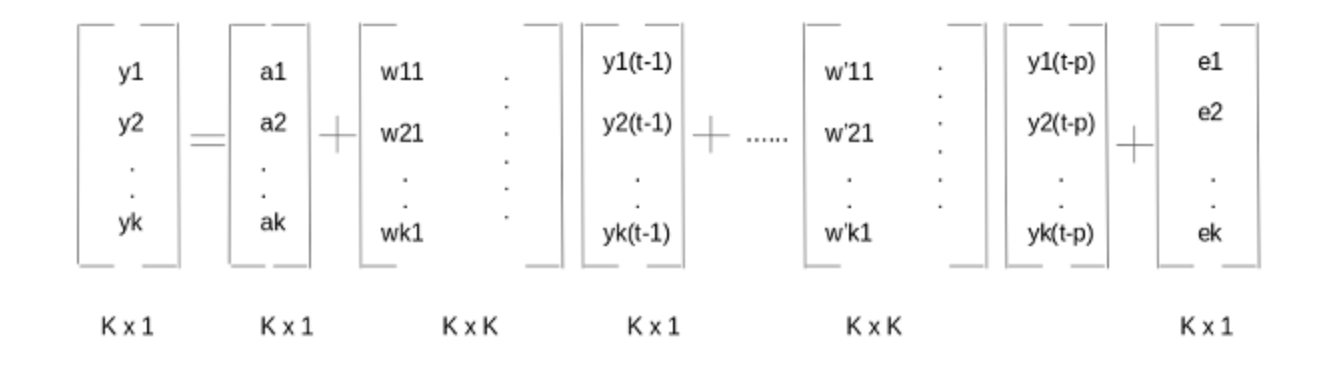


In [9]:
mdata = sm.datasets.macrodata.load_pandas().data
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pd.DatetimeIndex(quarterly)


NameError: name 'dates_from_str' is not defined

In [26]:
mdata


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [27]:
train=mdata[(mdata.index<"2007-12-26")]
test=mdata[(mdata.index>="2007-12-26")]

TypeError: Invalid comparison between dtype=int64 and str

## Switching dataset 

In [43]:
mdata1 = pd.read_csv('ETTh1.csv')
mdata2 = pd.read_csv('ETTh2.csv')

In [44]:
mdata1.drop(columns=["HUFL","HULL","MUFL","LUFL", "MULL","LULL"],inplace=True)
mdata2.drop(columns=["HUFL","HULL","MUFL","LUFL", "MULL","LULL"],inplace=True)

In [45]:
mdata=pd.merge(mdata1,mdata2,on='date')

In [46]:
mdata

,date,OT_x,OT_y
0,2016-07-01 00:00:00,30.531000,38.661999
1,2016-07-01 01:00:00,27.787001,37.124001
2,2016-07-01 02:00:00,27.787001,36.465000
3,2016-07-01 03:00:00,25.044001,33.608501
4,2016-07-01 04:00:00,21.948000,31.850500
...,...,...,...
17415,2018-06-26 15:00:00,10.904000,47.084999
17416,2018-06-26 16:00:00,11.044000,48.183498
17417,2018-06-26 17:00:00,10.271000,48.183498
17418,2018-06-26 18:00:00,9.778000,46.865501


In [47]:
mdata.set_index('date', inplace = True)
mdata=mdata.diff().dropna()
mdata=mdata.diff().dropna()
#mdata=mdata.diff().dropna()

mdata

,OT_x,OT_y
date,,
2016-07-01 02:00:00,2.743999,0.878998
2016-07-01 03:00:00,-2.743000,-2.197498
2016-07-01 04:00:00,-0.353001,1.098497
2016-07-01 05:00:00,2.322001,0.439501
2016-07-01 06:00:00,2.392000,0.879501
...,...,...
2018-06-26 15:00:00,-0.070000,-0.219498
2018-06-26 16:00:00,-0.564001,1.098499
2018-06-26 17:00:00,-0.912999,-1.098499


In [48]:
train=mdata[(mdata.index<"2017-12-26 17:00:00")]
test=mdata[(mdata.index>="2017-12-26 17:00:00")]

In [49]:
train.shape, test.shape, mdata.shape

((13047, 2), (4371, 2), (17418, 2))

In [50]:
model = VAR(train)

/Users/raman/opt/anaconda3/envs/NeuralPropherEnv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [51]:
results = model.fit(336)

In [52]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, May, 2023
Time:                     09:55:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.218787
Nobs:                     12711.0    HQIC:                 -0.306244
Log likelihood:          -31102.8    FPE:                   0.565560
AIC:                    -0.570136    Det(Omega_mle):        0.510113
--------------------------------------------------------------------
Results for equation OT_x
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.001084         0.007918           -0.137           0.891
L1.OT_x          -1.120551         0.009198         -121.831           0.000
L1.OT_y           0.091995         0.010167            9.049           0.000


In [53]:
arr_ = results.forecast(train.values[-336:],4371)

In [54]:
df_forecast= pd.DataFrame(arr_)
df_forecast

,0,1
0,0.069375,-1.179782
1,-0.283682,0.090998
2,-0.145592,-0.038774
3,0.138256,0.113134
4,-0.187171,0.240403
...,...,...
4366,-0.061244,-0.249331
4367,-0.067012,-0.233657
4368,-0.061938,-0.179277
4369,-0.047828,-0.101599


In [55]:
test

,OT_x,OT_y
date,,
2017-12-26 17:00:00,0.422000,-1.098999
2017-12-26 18:00:00,-0.563000,-0.219500
2017-12-26 19:00:00,0.071000,-0.220001
2017-12-26 20:00:00,-0.493000,1.099500
2017-12-26 21:00:00,-0.281001,0.219001
...,...,...
2018-06-26 15:00:00,-0.070000,-0.219498
2018-06-26 16:00:00,-0.564001,1.098499
2018-06-26 17:00:00,-0.912999,-1.098499


In [59]:
def MSE(g_truth, measured):
    n=len(g_truth)
    diff=g_truth-measured
    return np.sum(np.square(diff)) / n 

from sklearn.metrics import mean_absolute_percentage_error
def MAPE(g_truth, measured):
    return (mean_absolute_percentage_error(g_truth,measured))
    

In [61]:
MAPE(df_forecast[0].to_numpy() ,test["OT_x"].to_numpy()) , MAPE(df_forecast[1].to_numpy() ,test["OT_y"].to_numpy())

(212.6831573063804, 7.137266303342713)

In [62]:
df_forecast[0]

0       0.069375
1      -0.283682
2      -0.145592
3       0.138256
4      -0.187171
          ...   
4366   -0.061244
4367   -0.067012
4368   -0.061938
4369   -0.047828
4370   -0.028310
Name: 0, Length: 4371, dtype: float64

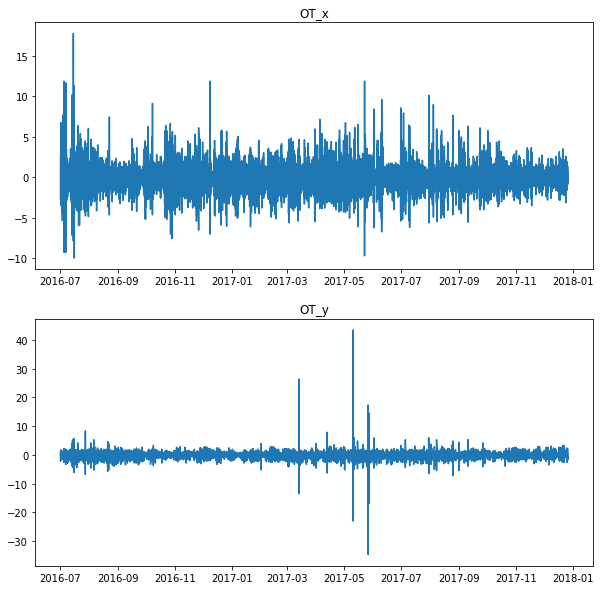

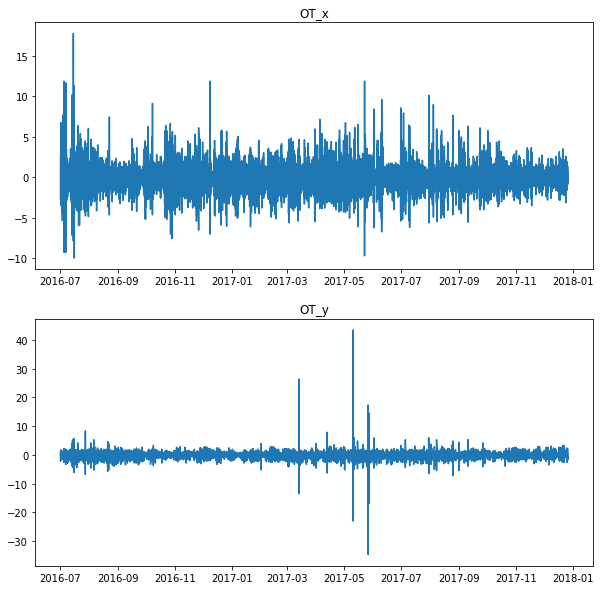

In [35]:
results.plot()

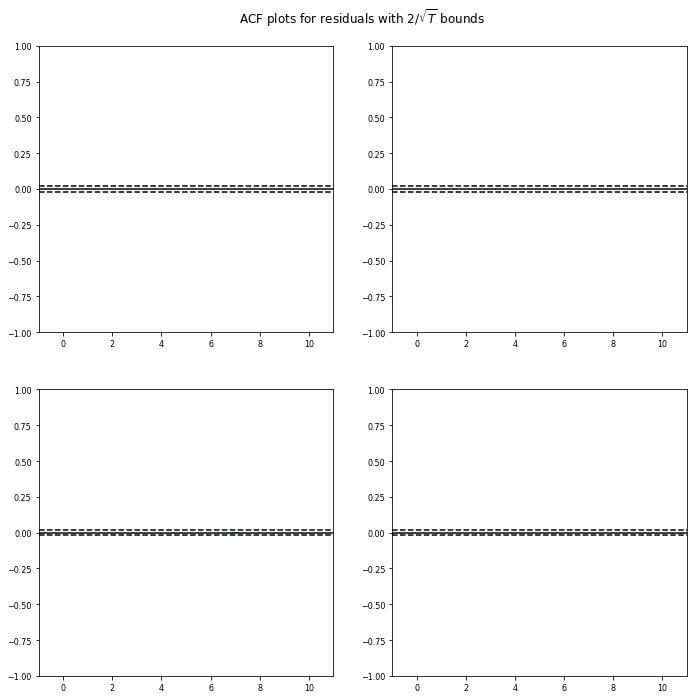

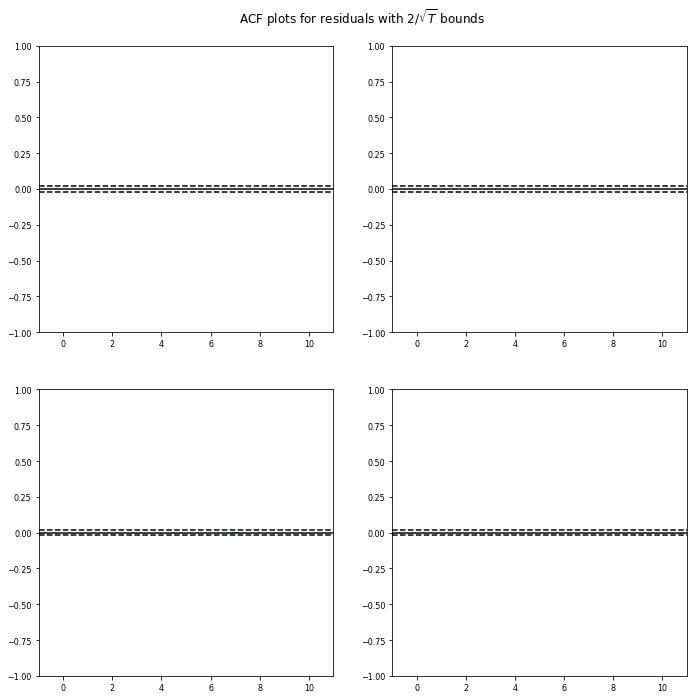

In [36]:
results.plot_acorr()

In [37]:
model.select_order(15)

In [38]:
results = model.fit(maxlags=15, ic='aic')

In [39]:
lag_order = results.k_ar

In [40]:
lag_order

15

In [41]:
results.forecast(data.values[-lag_order:], 50000)

NameError: name 'data' is not defined

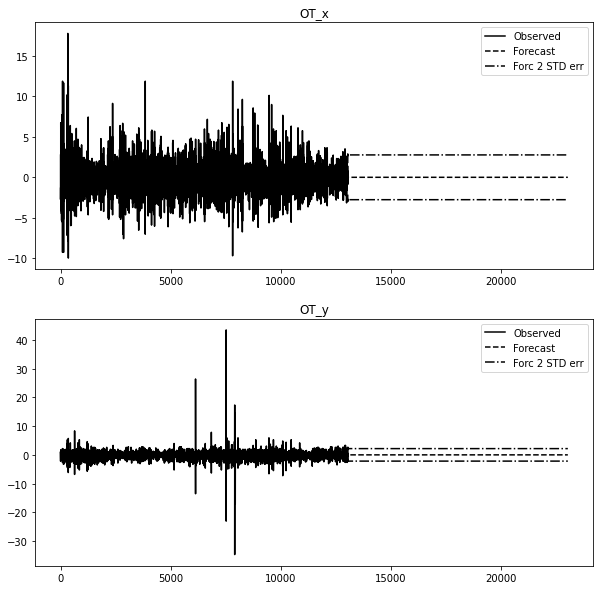

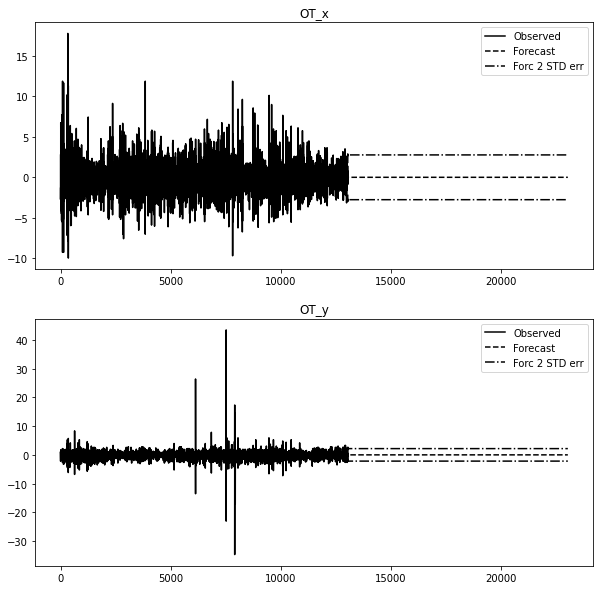

In [42]:
results.plot_forecast(10000)